In [57]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

In [58]:
dane = pd.read_excel("default of credit card clients.xls")

In [3]:
dane.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,yes
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,yes
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,no
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,no
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,no


In [4]:
dane.dtypes

ID                             int64
LIMIT_BAL                      int64
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                            int64
PAY_0                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month    object
dtype: object

In [5]:
dane.columns.tolist()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [6]:
dane.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default payment next month'], dtype=object)

In [59]:
#zmiana nazw kolumn
dane.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default']

In [8]:
#zmienna_objaśniana = 'default'
#zmienne_ciągłe_do_standaryzacji = ['BILL_AMT1',
      # 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       #'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
      # 'PAY_AMT6']
#reszta_zmiennych = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       #'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [9]:
#dane[zmienne_ciągłe_do_standaryzacji] = dane[zmienne_ciągłe_do_standaryzacji].apply(lambda x: (x-x.mean())/x.std())

In [10]:
dane.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,yes
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,yes
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,no
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,no
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,no


In [60]:
# przygotowanie listy zmiennych objaśniających 
zmienne_objasniajace = dane.columns.tolist()
zmienne_objasniajace.remove('default')
zmienne_objasniajace.remove('ID')

In [61]:
# Połączenie zmiennych w formułę
Prawa_strona_rownania = "+".join(zmienne_objasniajace)
print(Prawa_strona_rownania)

LIMIT_BAL+SEX+EDUCATION+MARRIAGE+AGE+PAY_0+PAY_2+PAY_3+PAY_4+PAY_5+PAY_6+BILL_AMT1+BILL_AMT2+BILL_AMT3+BILL_AMT4+BILL_AMT5+BILL_AMT6+PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4+PAY_AMT5+PAY_AMT6


Sprawdzamy jak zmienią się wyniki w zależności od wielkości próbki trenigowej i testowej

In [13]:
# Pętla po parametrze k, który zwiększa próbę testową od 0.1 do 0.9
for k in range(1, 10):
    X_train, X_test, y_train, y_test = train_test_split(dane, dane.default, test_size=0.1*k, random_state=0)
    model = sm.GLM.from_formula(formula="default~"+Prawa_strona_rownania, data=X_train, 
                              family=sm.families.Binomial())
    wynik = model.fit()
    # Liczymy predykcje na zbiorze treningowym
    predykcje_treningowe = wynik.predict()
    # Liczymy predykcje na zbiorze walidacyjnym
    predykcje_walidacji = wynik.predict(X_test)
    print(f"test: {k/10}, Train AUC:", round(roc_auc_score(y_train, 1-predykcje_treningowe), 4),
          "Valid AUC:", round(roc_auc_score(y_test, 1-predykcje_walidacji), 4))

test: 0.1, Train AUC: 0.7265 Valid AUC: 0.7201
test: 0.2, Train AUC: 0.7271 Valid AUC: 0.7212


C:\Users\micha\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


test: 0.3, Train AUC: 0.7282 Valid AUC: 0.7207
test: 0.4, Train AUC: 0.7269 Valid AUC: 0.7226
test: 0.5, Train AUC: 0.7259 Valid AUC: 0.7232
test: 0.6, Train AUC: 0.7271 Valid AUC: 0.7225


C:\Users\micha\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


test: 0.7, Train AUC: 0.7333 Valid AUC: 0.72


C:\Users\micha\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


test: 0.8, Train AUC: 0.728 Valid AUC: 0.7201
test: 0.9, Train AUC: 0.7481 Valid AUC: 0.7112


Walidacja krzyżowa dla 10 foldów

In [14]:
# Stworzenie funkcji do dzielenia foldów (w tym przypadku w walidacji 10 razy składanej)
kf = KFold(n_splits=10, shuffle=True, random_state=7)

# Aby oszczędzać pamięć informacja o foldach to wyłącznie numery wierszy
for train, test in kf.split(dane.index.values): 
   
    model = sm.GLM.from_formula(formula="default~"+Prawa_strona_rownania,
                              data=dane.iloc[train], family=sm.families.Binomial())
    wynik = model.fit()
    # Zapisanie predykcji na zbiorze treningowym w wektorze predykcje_treningowe
    predykcje_treningowe = wynik.predict()
    # Zapisanie predykcji na zbiorze walidacyjnym w wektorze predykcje_walidacji
    predykcje_walidacji = wynik.predict(dane.iloc[test])
    print("Train AUC:", np.round(roc_auc_score(dane.default.iloc[train], 1-predykcje_treningowe), 4),
          "Valid AUC:", np.round(roc_auc_score(dane.default.iloc[test], 1-predykcje_walidacji), 4))

Train AUC: 0.7277 Valid AUC: 0.7125
Train AUC: 0.7282 Valid AUC: 0.7094
Train AUC: 0.7257 Valid AUC: 0.7265
Train AUC: 0.725 Valid AUC: 0.7374
Train AUC: 0.7254 Valid AUC: 0.7288
Train AUC: 0.724 Valid AUC: 0.7477
Train AUC: 0.7268 Valid AUC: 0.7163
Train AUC: 0.7244 Valid AUC: 0.7375
Train AUC: 0.7289 Valid AUC: 0.6988
Train AUC: 0.726 Valid AUC: 0.7227


Wariancja wyniku na zbiorze walidacyjnym waha się pomiędzy 69,86% a 74,78%

Sprawdzamy walidację krzyżową dla 5 foldów

In [15]:
kf = KFold(n_splits=5, shuffle=True, random_state=7)

for train, test in kf.split(dane.index.values): 
   
    model = sm.GLM.from_formula(formula="default~"+Prawa_strona_rownania,
                              data=dane.iloc[train], family=sm.families.Binomial())
    wynik = model.fit()
    
    predykcje_treningowe = wynik.predict()
    predykcje_walidacji = wynik.predict(dane.iloc[test])
    
    print("Train AUC:", np.round(roc_auc_score(dane.default.iloc[train], 1-predykcje_treningowe), 4),
          "Valid AUC:", np.round(roc_auc_score(dane.default.iloc[test], 1-predykcje_walidacji), 4))

Train AUC: 0.7303 Valid AUC: 0.7113
Train AUC: 0.7243 Valid AUC: 0.7319
Train AUC: 0.7229 Valid AUC: 0.7386
Train AUC: 0.7251 Valid AUC: 0.7268
Train AUC: 0.7293 Valid AUC: 0.7102


Wariancja się zmniejszyła, natomiast sprawdzimy teraz wrażliwość zbioru na przyporządkowanie obserwacji do konkrentych foldów.

## Jak na zajęciach przygotowujemy wrapper do walidacji krzyżowej

In [62]:
def WalidacjaKrzyżowa(ilośćFoldów = 5, randomState=2020):
    # Podzielenie zbioru na foldy
    kf = KFold(n_splits = ilośćFoldów, shuffle=True, random_state=randomState)
    # Stworzenie listy z wynikami
    wynikiTreningowe = []
    wynikiTestowe = []
    # Pętla do estymacji i walidacji modeli na kolejnych foldach
    for train, test in kf.split(dane.index.values):
        # Stworzenie modelu
        model = sm.GLM.from_formula(formula="default~"+Prawa_strona_rownania,
                              data=dane.iloc[train], family=sm.families.Binomial())
        wynik = model.fit()
    
        predykcje_treningowe = wynik.predict()
        predykcje_walidacji = wynik.predict(dane.iloc[test])
        
        # Fakultatywnie możemy printować wyniki z każdego foldu
        #print("Train AUC:", roc_auc_score(dane.default.iloc[train], 1-predykcje_treningowe),
        #       "Valid AUC:", roc_auc_score(dane.default.iloc[test], 1-predykcje_walidacji))
        # Zapisanie wyników ze zbioru walidacyjnego do listy
        wynikiTreningowe.append(roc_auc_score(dane.default.iloc[train], 1-predykcje_treningowe))
        wynikiTestowe.append(roc_auc_score(dane.default.iloc[test], 1-predykcje_walidacji))
    # Zwracamy średnią z wyników
    return np.round(np.mean(wynikiTreningowe),3), np.round(np.mean(wynikiTestowe),3), np.round(np.mean(wynikiTreningowe) - np.mean(wynikiTestowe),3) 

In [17]:
for ilośćFoldów in [5,10]:
    for randomState in [1, 42, 101, 1997]:
        print(ilośćFoldów, randomState, WalidacjaKrzyżowa(ilośćFoldów, randomState))

5 1 (0.726, 0.724, 0.002)
5 42 (0.726, 0.724, 0.002)
5 101 (0.726, 0.724, 0.002)
5 1997 (0.726, 0.724, 0.002)
10 1 (0.726, 0.725, 0.001)
10 42 (0.726, 0.724, 0.002)
10 101 (0.726, 0.724, 0.002)
10 1997 (0.726, 0.724, 0.002)


# Funkcja do zapisywania wyników

In [63]:
def WalidacjaKrzyżowa(ilośćFoldów = 5, randomState=2020, debug = False):
    # Podzielenie zbioru na foldy
    kf = KFold(n_splits = ilośćFoldów, shuffle=True, random_state=randomState)
    
    # Stworzenie listy do zapisania wyników
    wynikiTreningowe = []
    wynikiTestowe = []
    Predykcje = []
    Indeksy = []
    
    # Pętla do estymacji i walidacji modeli na kolejnych foldach
    for train, test in kf.split(dane.index.values):
        # Stworzenie modelu
        model = sm.GLM.from_formula(formula="default~"+Prawa_strona_rownania,
                              data=dane.iloc[train], family=sm.families.Binomial())
        wynik = model.fit()
    
        predykcje_treningowe = 1 - wynik.predict()
        predykcje_walidacji = 1 - wynik.predict(dane.iloc[test])
        
        #Zapisujemy informacje o predykcjach
        Predykcje.append(predykcje_walidacji.tolist().copy())
        
        #zapisujemy indeksy w oryginalnym dataframie
        Indeksy.append(dane.iloc[test].index.tolist().copy())
        
        # Informowanie o każdym foldzie razem z wynikami treningowymi 
        wyliczeniaTreningowe = roc_auc_score((dane.default.iloc[train]=="yes").astype(int), predykcje_treningowe)
        wyliczeniaTestowe = roc_auc_score((dane.default.iloc[test]=="yes").astype(int), predykcje_walidacji)
        
        wynikiTreningowe.append(wyliczeniaTreningowe)
        wynikiTestowe.append(wyliczeniaTestowe)
        
        if debug:
            print("Train AUC:", wyliczeniaTreningowe,
                  "Valid AUC:", wyliczeniaTestowe)
    return wynikiTreningowe, wynikiTestowe, Predykcje, Indeksy

In [64]:
# Zapisanie wyników do zmiennych:
wynikiTreningowe, wynikiTestowe, Predykcje, Indeksy = WalidacjaKrzyżowa(ilośćFoldów = 5, randomState=1997)
print(np.mean(wynikiTreningowe), np.mean(wynikiTestowe))

0.7263954839462432 0.7241785409278926


In [65]:
print(wynikiTreningowe)
print(wynikiTestowe)

[0.7257676545377664, 0.7266519003801619, 0.7237476675661532, 0.7279123057775851, 0.7278978914695494]
[0.7262480078807979, 0.7249335866432677, 0.7326005537888947, 0.718695941031941, 0.7184146152945614]


# Klasa doświadczenia

In [66]:
WynikiModelu1 = {
    "Nazwa": "Regresja Logistyczna",
    "Opis":"Pierwszy model zaliczeniowy",
    "Specyfikacja modelu": "default ~ LIMIT_BAL+SEX+EDUCATION+MARRIAGE+AGE+PAY_0+PAY_2+PAY_3+PAY_4+PAY_5+PAY_6+BILL_AMT1+BILL_AMT2+BILL_AMT3+BILL_AMT4+BILL_AMT5+BILL_AMT6+PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4+PAY_AMT5+PAY_AMT6",
    "Wyniki Treningowe":wynikiTreningowe.copy(),
    "Wyniki Testowe":wynikiTestowe.copy(),
    "Predykcje":Predykcje.copy(),
    "Indeksy":Indeksy.copy(),
}

Kod do rysowania funkcji ROC

In [54]:
def WykresROC(wyniki):
    ''' Funkcja, do rysowania szeregu wyników krzywych ROC dla poszczególnych eksperymentów
    wyniki - lista wyników jako 3 elementowe tuple (true, pred, label)
    '''
    
    # Ustalanie wielkości rysunku
    fig, ax = plt.subplots(figsize=(10,10))
        
    for true, pred, label in wyniki:
        # Obliczenie punktów potrzebnych do narysowani krzywej ROC
        # funkcja roc_curve zwarca trzy serie danych, fpr, tpr oraz poziomy progów odcięcia
        fpr, tpr, thresholds = roc_curve(true, pred)
        # Obliczamy pole powierzchni pod krzywą
        rocScore = roc_auc_score(true, pred)
        rocScore = round(rocScore, 3)
    
        # Grubość krzywej
        lw = 2

        # Rysujemy krzywą ROC
        ax.plot(fpr, tpr, lw=lw, label=f'{label}: {rocScore}')
    # Rysujemy krzywą 45 stopni jako punkt odniesienia
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    # Dodajemy lekkie marginesy do zakresu aby krzywa nie pokrywała się z osiami
    ax.set_xlim([-0.01, 1.0])
    ax.set_ylim([0.0, 1.01])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'Receiver operating characteristic - {rocScore}')
    ax.legend(loc="lower right")
    plt.show()

In [67]:
wyniki1wykres = []
true = (dane.default=='yes').astype(int).sort_index()
for wynik in [WynikiModelu1]:
    pred = pd.Series(sum(WynikiModelu1['Predykcje'], []), index=sum(WynikiModelu1['Indeksy'], [])).sort_index()
    wyniki1wykres.append((true, pred, wynik['Nazwa']))

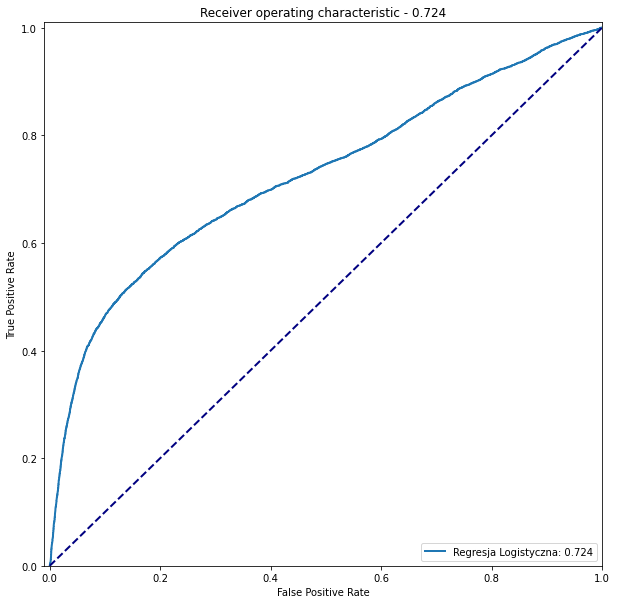

In [68]:
WykresROC(wyniki1wykres)

Kod do rysowania funkcji PR

In [55]:
def WykresPRcurve(wyniki):
    
    
    # Ustalanie wielkości rysunku
    fig, ax = plt.subplots(figsize=(10,10))
    
    # Liczymy punkty potrzebne do narysowania krzywej
    for precision, recall, threshold in wyniki:
        precision, recall, thresholds = precision_recall_curve(true, pred)

    # Obliczamy pole powierzchni pod krzywą
        average_precision = average_precision_score(true, pred)
        average_precision = round(average_precision, 2)

    # Rysujemy krzywą ROC
        ax.plot(recall, precision, color='b', lw=2, label=f'PR curve: {average_precision}')

    # Rysujemy krzywą 45 stopni jako punkt odniesienia
    ax.fill_between(recall, precision, step='post', alpha=0.25, color='b')

    # Dodajemy lekkie marginesy do zakresu aby krzywa nie pokrywała się z osiami
    ax.set_xlim([0, 1])
    ax.set_ylim([0.0, 1.01])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.legend(loc="lower right")
    plt.show()

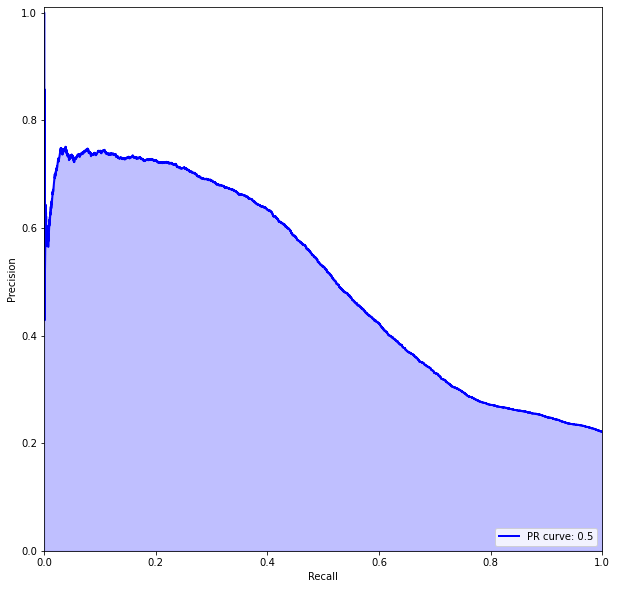

In [69]:
WykresPRcurve(wyniki1wykres)

# Random Forest

In [70]:
dane = pd.read_excel("default of credit card clients.xls")

In [71]:
#zmiana nazw kolumn
dane.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default']

In [72]:
from sklearn import metrics

import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

In [73]:
from sklearn import preprocessing

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
import random

In [ ]:
'''['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default']'''

In [14]:
dane.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,yes
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,yes
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,no
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,no
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,no


In [76]:
objasniana = "default"
numeryczne = ['ID','LIMIT_BAL','AGE','PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6']
kategoryczne = ['SEX', 'EDUCATION', 'MARRIAGE']

In [77]:
df = dane.copy()
mapy = {}
for zmienne in kategoryczne:
    LabEn = preprocessing.LabelEncoder()
    df[zmienne] = LabEn.fit_transform(dane[zmienne])
    mapy[zmienne] = LabEn

In [78]:
zmienne = df.columns.tolist()

In [79]:
zmienne

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default']

In [80]:
zmienne = df.columns.tolist()
zmienne.remove(objasniana)
zmienne.remove('ID')
print(zmienne)

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


#Wrapper do walidacji krzyżowej

In [81]:
def CVTestRFClass(nFolds = 5, randomState=2020, debug=False, features=zmienne, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    # listy do przechowywania wyników:
    wynikiTreningowe = []
    wynikiTestowe = []
    Predykcje = []
    Indeksy = []

    # Pętla walidująca model na kolejnych foldach
    for train, test in kf.split(df.index.values):
        # Przygotowanie estymatora
        clf = RandomForestClassifier(*args, **kwargs, random_state=randomState, n_jobs=-1)
        if debug:
            print(clf)
        # Trenowanie modelu
        clf.fit(df.iloc[train][zmienne], df.iloc[train][objasniana])

        # Przygotowanie prognoz dla zbioru treningowego i testowego
        # UWAGA Sklearn zwracał będzie dwie kolumny prawdopodobieństw dla obydwu klas
        Predykcje_Treningowe = clf.predict_proba(df.iloc[train][zmienne])[:,1]
        Predykcje_Testowe = clf.predict_proba(df.iloc[test][zmienne])[:,1]
        
        # Zachowajmy informacje o predykcjach dla tego foldu
        Predykcje.append(Predykcje_Testowe.tolist().copy())
        
        # Razem z indeksami w oryginalnym data frame
        Indeksy.append(df.iloc[test].index.tolist().copy())
        
        # Policzenie dopasowania za pomocą metryki ROC-AUC
        Wyliczenia_Treningowe = roc_auc_score((df[objasniana].iloc[train]=="yes").astype(int), Predykcje_Treningowe)
        Wyliczenia_Testowe = roc_auc_score((df[objasniana].iloc[test]=="yes").astype(int), Predykcje_Testowe)
        
        # Zapisanie wyników do listy 
        wynikiTreningowe.append(Wyliczenia_Treningowe)
        wynikiTestowe.append(Wyliczenia_Testowe)
        
        # Informowanie o każdym foldzie razem z wynikami treningowymi możemy opcjonalnie wyświetlać w trakcie
        if debug:
            print("Train AUC:", Wyliczenia_Treningowe,
                  "Valid AUC:", Wyliczenia_Testowe)
        
    return wynikiTreningowe, wynikiTestowe, Predykcje, Indeksy


In [38]:
wynikiTreningowe, wynikiTestowe, Predykcje, Indeksy = CVTestRFClass(debug=True)
print(np.mean(wynikiTestowe))

RandomForestClassifier(n_jobs=-1, random_state=2020)
Train AUC: 0.9999863351665178 Valid AUC: 0.7751415215492886
RandomForestClassifier(n_jobs=-1, random_state=2020)
Train AUC: 0.9999946474028656 Valid AUC: 0.7572986813393089
RandomForestClassifier(n_jobs=-1, random_state=2020)
Train AUC: 0.9999959746132004 Valid AUC: 0.7662363292937012
RandomForestClassifier(n_jobs=-1, random_state=2020)
Train AUC: 0.9999882886736233 Valid AUC: 0.7570317782451409
RandomForestClassifier(n_jobs=-1, random_state=2020)
Train AUC: 0.9999839981115847 Valid AUC: 0.7679273635380736
0.7647271347931026


Sprawdzamy jak się zmienią wyniki dla zmiany liczby drzew

In [40]:
for k in [10, 25, 50, 100, 200, 500, 1000]:
    wynikiTreningowe, wynikiTestowe, Predykcje, Indeksy = CVTestRFClass(n_estimators=k)
    print(k, np.mean(wynikiTreningowe), np.mean(wynikiTestowe), np.mean(wynikiTreningowe) - np.mean(wynikiTestowe))

10 0.9990446785896966 0.7324001412440715 0.2666445373456251
25 0.9999504345505216 0.7510555375858898 0.24889489696463174
50 0.9999836199612113 0.7593658120856397 0.24061780787557163
100 0.9999898487935583 0.764727525854992 0.2352623229385663
200 0.9999904294409359 0.7671468485174043 0.23284358092353152
500 0.9999932681033051 0.768212943643314 0.23178032445999108
1000 0.9999925481923999 0.7688154686476409 0.23117707954475897


Teraz patrzymy jak zmienia się wynik w zależności od głębokości drzew dla 100 drzew

In [42]:
for k in range(2,22,2):
    wynikiTreningowe, wynikiTestowe, Predykcje, Indeksy = CVTestRFClass(n_estimators=100, max_depth = k)
    print(k, np.mean(wynikiTreningowe), np.mean(wynikiTestowe), np.mean(wynikiTreningowe) - np.mean(wynikiTestowe))

2 0.7685022277625471 0.766508618995636 0.0019936087669110147
4 0.7764918016611644 0.7719423839338706 0.004549417727293781
6 0.7903899046465549 0.7759297760563888 0.0144601285901661
8 0.8161229126109492 0.7792525403647166 0.036870372246232574
10 0.8560057462099351 0.7805605954425732 0.07544515076736191
12 0.9029918766515717 0.7808763662756241 0.12211551037594759
14 0.9446419372412537 0.7776191758336749 0.16702276140757877
16 0.9735864973647379 0.7768284159863277 0.19675808137841022
18 0.9897043354393237 0.7760932460162107 0.21361108942311302
20 0.9966057932018562 0.7715887582154751 0.22501703498638104


Wraz z ciągłym zwiększaniem głębokości drzew, rośnie przetrenowanie. Teraz sprawdzamy w zalezności od ilości zmiennych w drzewie

In [43]:
print(len(zmienne))

23


In [44]:
for k in range(3, len(zmienne)+1, 2):
    wynikiTreningowe, wynikiTestowe, Predykcje, Indeksy = CVTestRFClass(n_estimators=100, max_depth = 10,
                                                                       max_features=k)
    print(k, np.mean(wynikiTreningowe), np.mean(wynikiTestowe), np.mean(wynikiTreningowe) - np.mean(wynikiTestowe))

3 0.8559583373252184 0.7804664561000401 0.07549188122517836
5 0.8568972088606447 0.780260364709616 0.07663684415102867
7 0.8590968054927661 0.7809139886642393 0.07818281682852679
9 0.8602672652594773 0.7806734189789047 0.07959384628057253
11 0.8611823275924759 0.7803698370416161 0.08081249055085982
13 0.8627800378362112 0.779810845015158 0.0829691928210532
15 0.8631558144153736 0.7809272066894619 0.08222860772591167
17 0.8640508383339471 0.780151810005737 0.08389902832821017
19 0.8638263615674878 0.7803784893337296 0.08344787223375827
21 0.8632088813670971 0.7799678224518143 0.08324105891528277
23 0.8633370903075142 0.7800581877486166 0.08327890255889758


Najlepiej wychodzi dla 7 zmiennych.

Sprawdzamy min_samples_split oraz min_samples_leaf

In [46]:
for k in [2, 4, 6, 8, 10, 15, 20, 30]:
    wynikiTreningowe, wynikiTestowe, Predykcje, Indeksy = CVTestRFClass(n_estimators=100, max_depth = 10,
                                                                       max_features=7,
                                                                       min_samples_split=k)
    print(k, np.mean(wynikiTestowe))
    

2 0.7809139886642393
4 0.7805493058505777
6 0.7811835160941835
8 0.7810795109488992
10 0.7805991364162248
15 0.7805316210863349
20 0.7809026183645472
30 0.7811590323285055


In [47]:
for k in [1, 2, 4, 6]:
    wynikiTreningowe, wynikiTestowe, Predykcje, Indeksy = CVTestRFClass(n_estimators=100, max_depth = 10,
                                                                       max_features=7,
                                                                       min_samples_split=6, min_samples_leaf=k)
    print(k, np.mean(wynikiTestowe))

1 0.7811835160941835
2 0.7805814157366457
4 0.7811482741530908
6 0.7814283959349618


Najlepszy wynik dla 1 czyli bez ograniczeń

# Szukamy teraz najlepszych kombinacji wartości hiperparametrów

In [2]:
wynikiHiper = []

In [28]:

for k in range(50):
    # Przygotujmy słownik parametrów
    # Jako punkt odniesienia do wybranych przedziałów posłużą nam wcześniejsze wyniki
    parametry = {
        "max_depth" : random.randint(6, 21),
        "max_features" : random.randint(3, 16),
        "min_samples_split" : random.randint(2, 11),
    }
    # Wartość min_samples_leaf musi być mniejsza niż min_samples_split
    parametry["min_samples_leaf"] = random.randint(1, parametry["min_samples_split"])
    
    # Estymacja modelu dla wylosowanych hiperparametrów
    wynikiTreningowe, wynikiTestowe, Predykcje, Indeksy = CVTestRFClass(n_estimators=100,
                                                                    max_depth=parametry["max_depth"],
                                                                    max_features=parametry["max_features"],
                                                                    min_samples_split=parametry["min_samples_split"],
                                                                    min_samples_leaf=parametry["min_samples_leaf"])
    
    # Zapiszmy wynik
    wynikiHiper.append((np.mean(wynikiTestowe), parametry.copy()))
    
    # Wyświetlmy wynik bieżącej iteracji
    print(parametry, np.mean(wynikiTestowe))
    
    # Co 10 iteracji wyświetlmy sobie nasze dotychczasowe top 5
    if k>1 and k%10==0:    
        print("\n Top 5:")
        for score, parametry in sorted(wynikiHiper, key=lambda x: x[0], reverse=True)[0:5]:
            print(parametry, score)
        print()

{'max_depth': 6, 'max_features': 7, 'min_samples_split': 10, 'min_samples_leaf': 8} 0.7764293410996576
{'max_depth': 20, 'max_features': 11, 'min_samples_split': 8, 'min_samples_leaf': 6} 0.7753349192167714
{'max_depth': 17, 'max_features': 12, 'min_samples_split': 5, 'min_samples_leaf': 4} 0.7761244354559897
{'max_depth': 10, 'max_features': 12, 'min_samples_split': 6, 'min_samples_leaf': 2} 0.78071395909515
{'max_depth': 21, 'max_features': 15, 'min_samples_split': 11, 'min_samples_leaf': 1} 0.7706948338829507
{'max_depth': 17, 'max_features': 15, 'min_samples_split': 7, 'min_samples_leaf': 2} 0.7744776023728551
{'max_depth': 8, 'max_features': 8, 'min_samples_split': 2, 'min_samples_leaf': 1} 0.7793784486467917
{'max_depth': 12, 'max_features': 14, 'min_samples_split': 7, 'min_samples_leaf': 5} 0.7806771304756213
{'max_depth': 7, 'max_features': 3, 'min_samples_split': 3, 'min_samples_leaf': 1} 0.7768024728448244
{'max_depth': 15, 'max_features': 5, 'min_samples_split': 11, 'min_sam

In [29]:
for score, parametry in sorted(wynikiHiper, key=lambda x: x[0], reverse=True)[0:5]:
    print(parametry, score)

{'max_depth': 13, 'max_features': 8, 'min_samples_split': 10, 'min_samples_leaf': 9} 0.7818284878704471
{'max_depth': 10, 'max_features': 15, 'min_samples_split': 10, 'min_samples_leaf': 10} 0.7817722144254562
{'max_depth': 15, 'max_features': 5, 'min_samples_split': 11, 'min_samples_leaf': 9} 0.7815952482216147
{'max_depth': 15, 'max_features': 3, 'min_samples_split': 10, 'min_samples_leaf': 8} 0.7815197879964618
{'max_depth': 17, 'max_features': 3, 'min_samples_split': 7, 'min_samples_leaf': 6} 0.7813163070552369


W naszym przypadku głębokość drzewa dla najlepszych wyników kształtowała sie powyżej 10, maksymalna liczba zmiennych okazała się
nieistotna, natomiast minimalna wartość splitu i minimalna wartość na liściu kształtują się kolejno : ok. 10-11, ok. 9.

In [83]:
wynikiTreningowe, wynikiTestowe, Predykcje, Indeksy = CVTestRFClass(n_estimators=500, max_depth = 13,
                                                                       max_features=8,
                                                                       min_samples_split=10, min_samples_leaf=9)
print(np.mean(wynikiTestowe))

WynikiModeluRF = {
    "Nazwa": "Random Forest",
    "Opis":"Trzeci model zaliczeniowy",
    "Specyfikacja modelu": "n_estimators=100, max_depth = 10,max_features=7, min_samples_split=6, min_samples_leaf=1",
    "Wyniki Treningowe":wynikiTreningowe.copy(),
    "Wyniki Testowe":wynikiTestowe.copy(),
    "Predykcje":Predykcje.copy(),
    "Indeksy":Indeksy.copy(),
}

0.7825608581923573


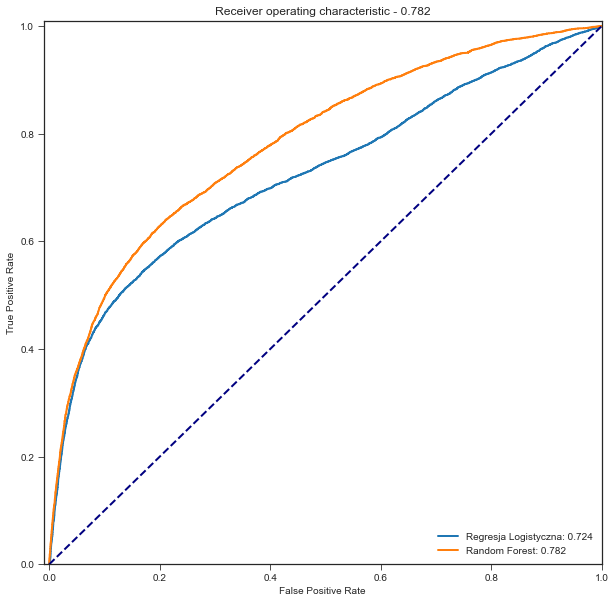

In [84]:
wyniki2wykres = []
true = (df[objasniana]=='yes').astype(int).sort_index()
for wynik in [WynikiModelu1, WynikiModeluRF]:
    pred = pd.Series(sum(wynik['Predykcje'], []), index=sum(wynik['Indeksy'], [])).sort_index()
    wyniki2wykres.append((true, pred, wynik['Nazwa']))
    
WykresROC(wyniki2wykres)

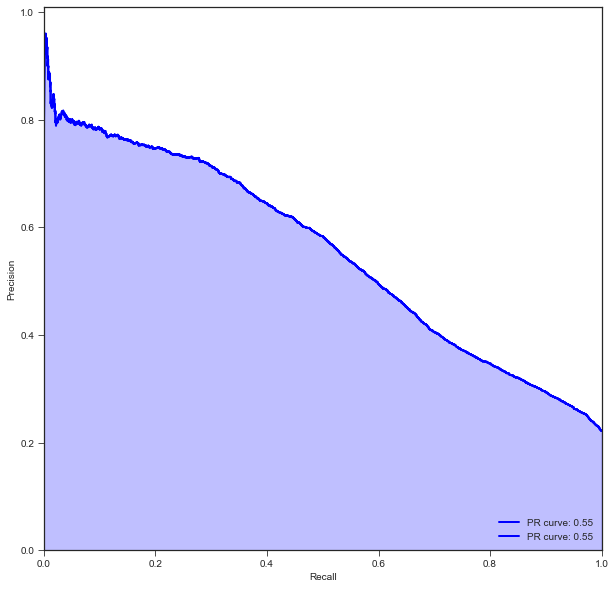

In [85]:
WykresPRcurve(wyniki2wykres)

# Sieci Neuronowe

In [4]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
# from keras.backend.tensorflow_backend import set_session

import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing.text import Tokenizer
from keras.layers.advanced_activations import PReLU


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

import time
%matplotlib inline

import gc

In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10427048784596658474
]


In [90]:
dane = pd.read_excel("default of credit card clients.xls")

In [91]:
#zmiana nazw kolumn
dane.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default']

In [92]:
objasniana = "default"
numeryczne = ['LIMIT_BAL','AGE','PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6']
kategoryczne = ['SEX', 'EDUCATION', 'MARRIAGE']

In [93]:
dummLev = pd.get_dummies(dane[kategoryczne], drop_first=True)

dfsn = pd.concat([dane[numeryczne], dummLev, dane[[objasniana]]], axis = 1)

In [94]:
dfsn.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT6,SEX_male,EDUCATION_highschool,EDUCATION_other,EDUCATION_university,EDUCATION_unknown,MARRIAGE_others,MARRIAGE_single,MARRIAGE_unknown,default
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,1,0,0,0,0,yes
1,120000,26,-1,2,0,0,0,2,2682,1725,...,2000,0,0,0,1,0,0,1,0,yes
2,90000,34,0,0,0,0,0,0,29239,14027,...,5000,0,0,0,1,0,0,1,0,no
3,50000,37,0,0,0,0,0,0,46990,48233,...,1000,0,0,0,1,0,0,0,0,no
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,679,1,0,0,1,0,0,0,0,no


In [95]:
dfsn[numeryczne] = dfsn[numeryczne].apply(lambda x: (x-x.mean())/x.std())

In [96]:
dfsn[objasniana] = (dfsn[objasniana]=="yes").astype(int)

In [97]:
dfsn.shape

(30000, 29)

In [98]:
zmienne = dfsn.columns.tolist()
zmienne.remove(objasniana)
print(zmienne)

['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_male', 'EDUCATION_highschool', 'EDUCATION_other', 'EDUCATION_university', 'EDUCATION_unknown', 'MARRIAGE_others', 'MARRIAGE_single', 'MARRIAGE_unknown']


In [99]:
# Funkcja pomocnicza,która pozwoli nam również zaawansowane funkcje aktywacji wybierać po imieniu
def actModel(model, activation):
    if activation=='prelu':
        model.add(keras.layers.advanced_activations.PReLU(weights=None, alpha_initializer="zero"))
    else:
        model.add(Activation(activation))
    return


# Wydzielona funkcja, która odpowiada wyłącznie za budowę sieci.
def stworz_siec(n=3, nu1=10, nu2=5, nu3=5,
                   activation='relu',
                   dropout=Dropout,
                   dropout_rate=0,
                   regu=0,
                   kernel_initializer='lecun_normal',
                   optimizer='SGD',
                   num_classes=1, 
                  inputShape=10, dropout_all_layers = False, debug=False, *args, **kwargs):
    nu=[nu1, nu2, nu3]
    # Jeżeli włączony jest tryb debug wyświetlimy parametry funkcji
    if debug:
        print(locals())
        
    # Inicjacja podstawowego modelu keras w trybie sekwencyjnym
    # W ten sposób najłatwiej zbutować w pełni połączone sieci feed forward.
    model = Sequential()
    
    # Definicja inputów do sieci oraz pierwszej warstwy
    # nu[0] odpowiada za liczbę neuronów w pierwszej warstwie
    # dodatkowo ustalamy jak inicjalizować parametry raz czy stosować refularyzację.
    model.add(Dense(nu[0],input_shape=(inputShape,),
                    kernel_initializer=kernel_initializer, kernel_regularizer=regularizers.l2(regu)))
    
    # Dodanie funkcji aktywacji do pierwszej warstwy.
    actModel(model, activation)
    
    # Opcjonalne włączenie mechanizmu dropout
    if dropout_rate > 0.01:
        model.add(dropout(dropout_rate))
    
    # Kolejne warstwy budowane są w ten sam sposób, co pozwala budować je w pętli
    # Pierwsza warstwa jako jedyna musiała mieć zdefiniowany input
    # W pozostałych warstwach model automatycznie keras połączy warstwy,
    # Input do kolejnej warstwy będzie outputem z wcześniejszych warstw.
    for i in range(1, n):
        # Inicjalizacja warstwy przez potanie liczby neuronów oraz sposobu inicjacji
        model.add(Dense(nu[i], kernel_initializer=kernel_initializer))
        # Definicja funkcji aktywacji
        actModel(model, activation)
        
        # Opcjonalne dodanie dropout
        if dropout_rate > 0.01 and dropout_all_layers:
            model.add(dropout(dropout_rate))

    # Aby "zakończyć" sieć niezbędne jest przygotowanie odpowiedniej liczby neuronów
    # Wystarczy jeden neuron dla regresji
    # Dla klasyfikacji binarnej oraz wieloklasowej potrzeba tyle neuronów co klas.
    # Dla binarne będą to dwa neurony.
    # W przypadku klasyfikacji wieloklasowej target musi być również podany w postaci one- hot encoding.
    model.add(Dense(num_classes))
    
    # Dla klasyfikacji binarnej lub wieloklasowej jako funkcję aktywacji stosujemy softmax
    # Będzie on odpowiadał transformacji logistycznej.
    # W problemie regresji możemy po prostu wykorzystać funkcję liniową.
    # Na chwilę obecną budujemy wrapper dla klasyfikacji binarnej
    # Poniżej pozostawiamy softmax, z funkcją straty categorical_crossentropy oraz accuracy jak bazową metryką.
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

Przygotowywujemy funkcję, która bedzie wraperem do budowania sieci, trenowania oraz zapisywania wyników

In [100]:
def net(train, test, features, target, epochs = 30, batchSize=100, debug=False, *args, **kwargs):
    
    # Przygotowanie zmiennych
    y_train = pd.get_dummies(train[objasniana]).values
    y_test = pd.get_dummies(test[objasniana]).values
    x_train = train[zmienne].values
    x_test = test[zmienne].values
    
    num_classes = y_train.shape[1]
    
    # Wyświetlenie informacji opisowych jeżeli jesteśmy w trybie debugowym
    if debug:
        print('Loading data...')
        print(len(x_train), 'train sequences')
        print(len(x_test), 'test sequences')
        print(num_classes, 'classes')
        print('x_train shape:', x_train.shape)
        print('x_test shape:', x_test.shape)
        print('\nBuilding network 1...')
    
    # Stworzenie modelu z użyciem funkcji create_network.
    model = stworz_siec(num_classes=num_classes, inputShape=x_train.shape[1], debug=debug, *args, **kwargs)
    
    # Przygotowanie zmiennych do przechowywania statystyk dotyczących szkolenia
    history_model = dict()
    loss = []
    valLoss = []
    acc = []
    valAcc = []
    auc = []
    valAuc = []
    
    
    bestTrainProba = []
    bestTestProba = []
    bestAuc = 0
    # Iteracyjne uruchomienie szkolenia.
    # UWAGA! W "profesjonalnym" wykorzystaniu Kerasa stosuje się tzw. callbacki, 
    # callbacki to funkcje do uruchamiania pomiędzy iteracjami.
    # W naszej dydaktycznej implementacji sami będziemy iterować szkolenie w pętli po jednej iteracji
    for z in range(epochs):
        # Wykonaj jedną ideacje szkolenia
        histModel = model.fit(x_train,
                                    y_train,
                                    batch_size=batchSize,
                                    epochs=1,
                                    verbose=debug,
                                    validation_split=0.0,
                                   validation_data=(x_test, y_test))
        # Zrób prognoze na zbiorze treningowym
        probaTrain = model.predict(x_train,
                                       batch_size=y_train.shape[0],
                                       verbose=debug)
        # Zrób prognozę na zbiorze testowym
        probaTest = model.predict(x_test,
                                       batch_size=y_test.shape[0],
                                       verbose=debug)
        # Obliczenie statystyk AUC
        # We wcześniejszych wersjach Keras nie miał wbudowanego liczenia auc pomiędzy iteracjami
        aucTrain = roc_auc_score(train[objasniana], probaTrain[:,1])
        aucTest = roc_auc_score(test[objasniana], probaTest[:,1])
        if debug:
            print(aucTrain, aucTest)
            
        # Ręczna implementacja zapisywania prognoz z najlepszej iteracji
        if aucTest>bestAuc:
            bestAuc = aucTest
            bestTrainProba = probaTrain[:, 1].tolist()
            bestTestProba = probaTest[:, 1].tolist()
        
        # Zapisanie wyników w tej iteracji
        loss.append(histModel.history['loss'][0])
        valLoss.append(histModel.history['val_loss'][0])
#         acc.append(histModel.history['acc'][0])
#         valAcc.append(histModel.history['acc'][0])
        auc.append(aucTrain)
        valAuc.append(aucTest)
        
    # Zapisanie wyników ze wszystkich iteracji do słownika
    history_model['loss'] = loss
    history_model['valLoss'] = valLoss
#     history_model['acc'] = acc
#     history_model['valAcc'] = valAcc
    history_model['auc'] = auc
    history_model['valAuc'] = valAuc
    return max(valAuc), bestTrainProba, bestTestProba, history_model


In [21]:
test_size=0.3
X_train, X_valid = train_test_split(dfsn, test_size=test_size, random_state=2020, stratify=dfsn[objasniana].values)
score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, zmienne, objasniana, n=2, nu1=400, nu2=100,
                                                    epochs = 50, batchSize=50, debug=True)
print(score)

Loading data...
21000 train sequences
9000 test sequences
2 classes
x_train shape: (21000, 28)
x_test shape: (9000, 28)

Building network 1...
{'n': 2, 'nu1': 400, 'nu2': 100, 'nu3': 5, 'activation': 'relu', 'dropout': <class 'keras.layers.core.Dropout'>, 'dropout_rate': 0, 'regu': 0, 'kernel_initializer': 'lecun_normal', 'optimizer': 'SGD', 'num_classes': 2, 'inputShape': 28, 'dropout_all_layers': False, 'debug': True, 'args': (), 'kwargs': {}, 'nu': [400, 100, 5]}
1/1 [==============================] - 0s 252ms/step
0.7161002040635668 0.7049681907863456
1/1 [==============================] - 0s 24ms/step
0.7414294585388311 0.7258553417615682
1/1 [==============================] - 0s 28ms/step
0.7532772885246906 0.7359573351876854
1/1 [==============================] - 0s 24ms/step
0.7595411087223436 0.739633888236829
1/1 [==============================] - 0s 25ms/step
0.767455346080423 0.7468171975774277
1/1 [==============================] - 0s 25ms/step
0.7749076317009674 0.7530328

1/1 [==============================] - 0s 24ms/step
0.8035359302925964 0.76305390952108
1/1 [==============================] - 0s 25ms/step
0.8071757911700139 0.7649114265729524
1/1 [==============================] - 0s 24ms/step
0.8036580722591031 0.7612259519385243
1/1 [==============================] - 0s 25ms/step
0.8085454884707869 0.7656915815849594
1/1 [==============================] - 0s 26ms/step
0.8076900603173863 0.7648061232028649
1/1 [==============================] - 0s 27ms/step
0.8092972098149278 0.7667238340831646
1/1 [==============================] - 0s 25ms/step
0.812489855233666 0.7656720902500401
1/1 [==============================] - 0s 26ms/step
0.8107324536101744 0.7648663528609517
1/1 [==============================] - 0s 24ms/step
0.8086278576221412 0.7654260121466846
1/1 [==============================] - 0s 25ms/step
0.8121009464718986 0.7654275886517149
1/1 [==============================] - 0s 27ms/step
0.8134674385168419 0.7657707651330687
1/1 [========

0.7667238340831646


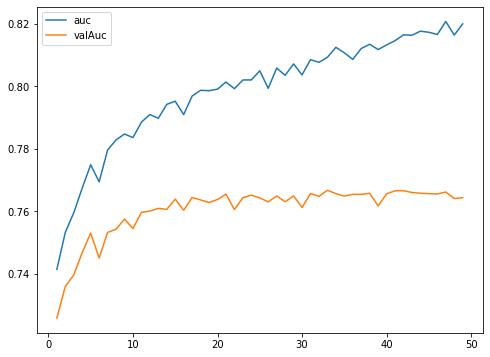

In [22]:
history = pd.DataFrame(history)
print(history.valAuc.max())
history.loc[1:, ["auc", "valAuc"]].plot(figsize=(8,6))
plt.show()

# Sprawdzamy teraz, jak wpłyną na wyniki zmiany optymalizatorów

In [23]:
os.makedirs("imgNets", exist_ok=True)

SGD 0.766033862324819
RMSprop 0.7684205117922934
Adagrad 0.7380165015647888
Adadelta 0.6542361514244547
Adam 0.7694476406491503
Adamax 0.7649291622545427


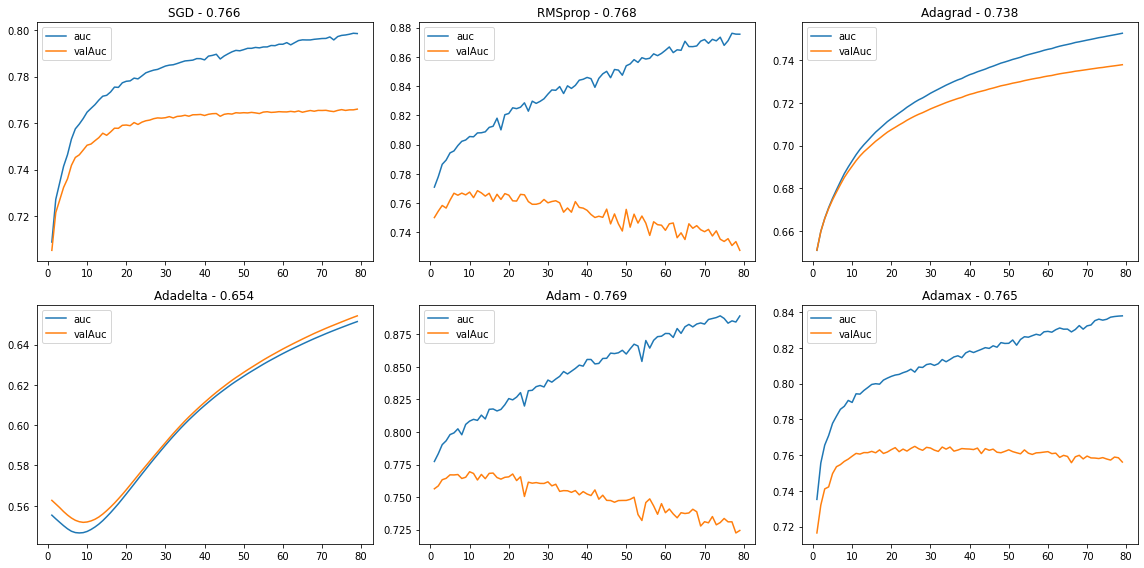

In [24]:
opti = ["SGD", "RMSprop", "Adagrad", "Adadelta", "Adam", "Adamax"]
test_size=0.3
X_train, X_valid = train_test_split(dfsn, test_size=test_size, random_state=2020, stratify=dfsn[objasniana].values)
fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()

n = 2
nu1 = 100
nu2 = 40
nu3 = 10

for i, opt in enumerate(opti):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, zmienne, objasniana, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 80, batchSize=100, optimizer=opt, debug=False)
    print(opt, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(opt+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/opti_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

Jak widzimy Adagrad i Adadelta zachowywaly się stabilnie, ale nie osiągnęły tak wysokich poziomów jak reszta.
RMSprop bardzo szybko widzimy rozpędzanie przez co jest bardzo duzy rozzstrzał.
W przypadku SGD osiagneliśmy dobry wynik i przebiagało to bardzo stabilnie, natomiast bardzo późno osiągneliśmy najlepszą wartość.
Najlepsze okazały się Adam oraz Adamax, gdyż osiągneliśmy (w przypadku Adam) najlepszy wynik oraz bliskie niemu(dla Adamax),
juz w okolicach 10-20 iteracji.

Teraz przeprowadzimy ten sam eksperyment dla dużo większej sieci(tez dwuwarstwowej)

SGD 0.7657233983228423
RMSprop 0.7657897906824109
Adagrad 0.748405024780151
Adadelta 0.6986754276395297
Adam 0.7656918323925778
Adamax 0.7682150286934666


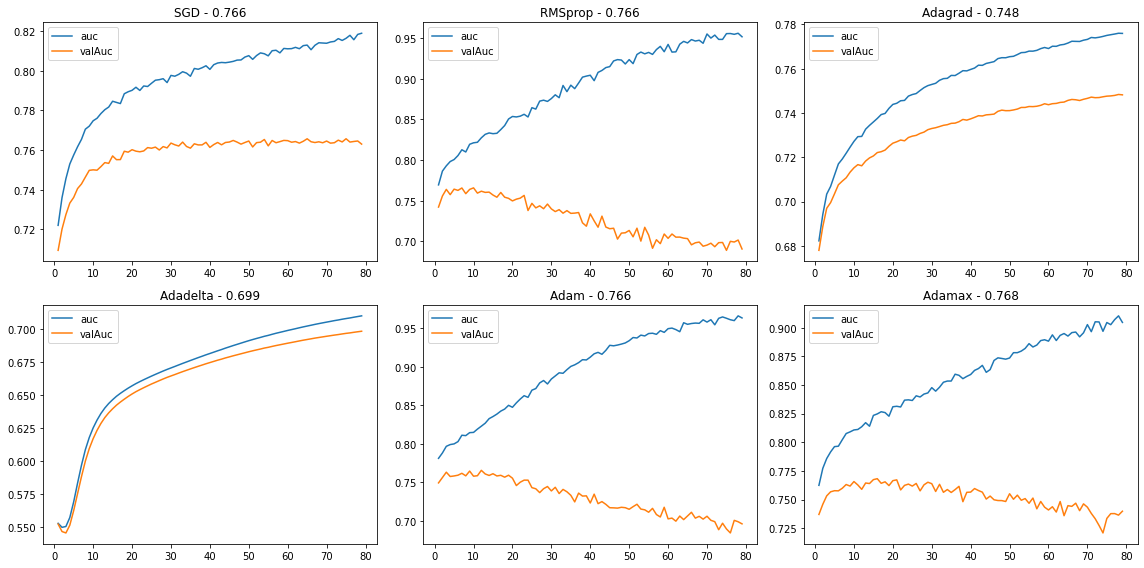

In [25]:
opti = ["SGD", "RMSprop", "Adagrad", "Adadelta", "Adam", "Adamax"]
test_size=0.3
X_train, X_valid = train_test_split(dfsn, test_size=test_size, random_state=2020, stratify=dfsn[objasniana].values)
fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()

n = 2
nu1 = 400
nu2 = 100
nu3 = 10

for i, opt in enumerate(opti):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, zmienne, objasniana, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 80, batchSize=100, optimizer=opt, debug=False)
    print(opt, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(opt+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/opti_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

Dla większej sieci widzimy podobne zależności, natomiast zbiór treningowy dużo szybciej się przetrenowuje, co pokazuje jak wazny jest earlystopping.

Finalnie sprawdzamy jeszcze raz tylko dla dużej 3 warstwowej sieci

SGD 0.767086788536716
RMSprop 0.769151651829724
Adagrad 0.7379718936383651
Adadelta 0.6215696415006065
Adam 0.7691132782641017
Adamax 0.7703302326584626


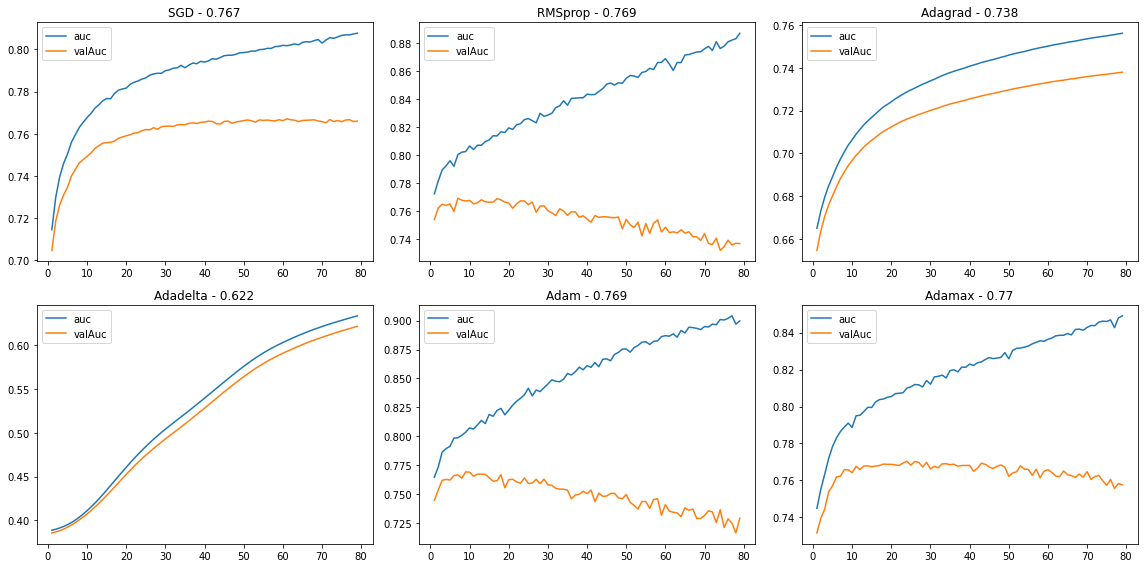

In [26]:
opti = ["SGD", "RMSprop", "Adagrad", "Adadelta", "Adam", "Adamax"]
test_size=0.3
X_train, X_valid = train_test_split(dfsn, test_size=test_size, random_state=2020, stratify=dfsn[objasniana].values)
fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()

n = 3
nu1 = 100
nu2 = 40
nu3 = 10

for i, opt in enumerate(opti):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, zmienne, objasniana, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 80, batchSize=100, optimizer=opt, debug=False)
    print(opt, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(opt+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/opti_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

Wnioski pozostają te same, natomiast dla tych rozmiarów SGD RMSprop Adam i Adamax osiągają zblożonej wyniki.

Sprawdzimy teraz jak wielkość próbki brana na potrzeby aktualizacji jednego gradientu wpływa na SGD oraz Adam

SGD 50 0.7695342767664936
SGD 100 0.7703739448433918
SGD 200 0.7645475405482468
SGD 500 0.7504827150913596
Adam 50 0.7709664957568009
Adam 100 0.7703109921311618
Adam 200 0.7665545389407135
Adam 500 0.7672151662077007


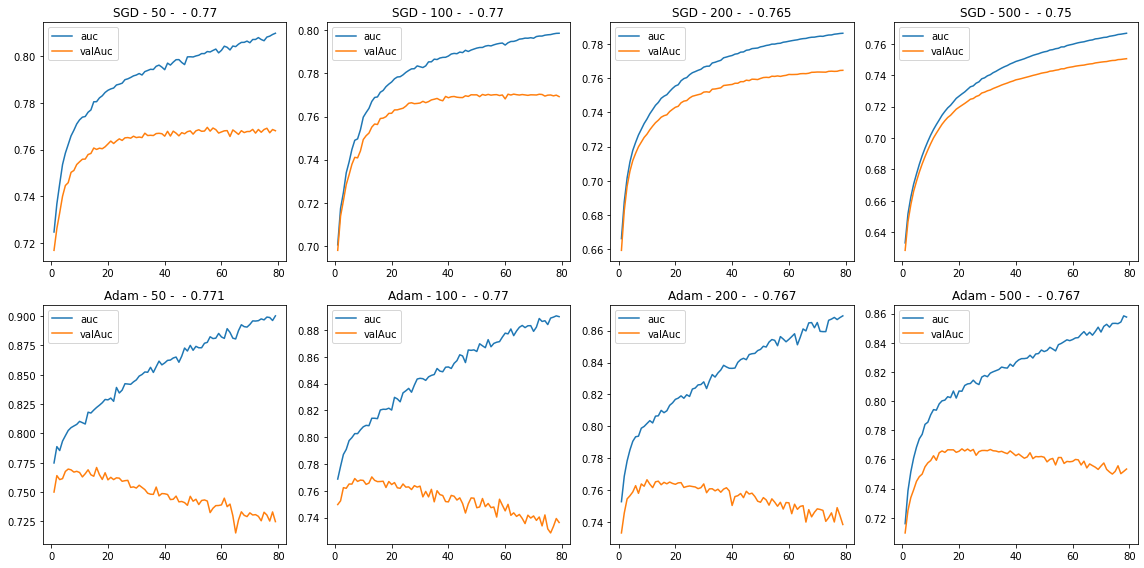

In [27]:
opti = ["SGD", "Adam"]
batchSizes = [50, 100, 200, 500]

fig, ax = plt.subplots(2, 4, figsize=(16,8))

n = 2
nu1 = 100
nu2 = 40
nu3 = 10

for i, opt in enumerate(opti):
    for j, batch in enumerate(batchSizes):
        score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, zmienne, objasniana, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 80, batchSize=batch, optimizer=opt, debug=False)
        print(opt, batch, score)
        history = pd.DataFrame(history)
        history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i, j])
        ax[i, j].set_title(opt+ " - " + str(batch) + " - "+ " - " + str(round(score, 3)))
        gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/batchSize_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

W przypadku SGD wiekszy batch size oznacza mniej kroków, czyli mniej czasu na poprawe parametrów.

W przypadku Adam wraz z większym batch size dalej szybko osiąga maksimum ale robi to w bardziej bładki sposób z mniejszą wariancją, czyli stabilniej osiąga wyniki. W naszym przypadku gorsze, ale różnice są bardzo małe.

# Funkcje aktywacji

Sprawdzimy teraz jak zachowają się wyniki dla róźnych funkcji aktywacji

Wpierw dla sieci 2 a potem 3 warstwowej 

tanh 0.7735694847100152
sigmoid 0.7739583081779263
linear 0.7215129661447695
relu 0.7690502897222119
selu 0.7701170820124432
prelu 0.7653979575230784


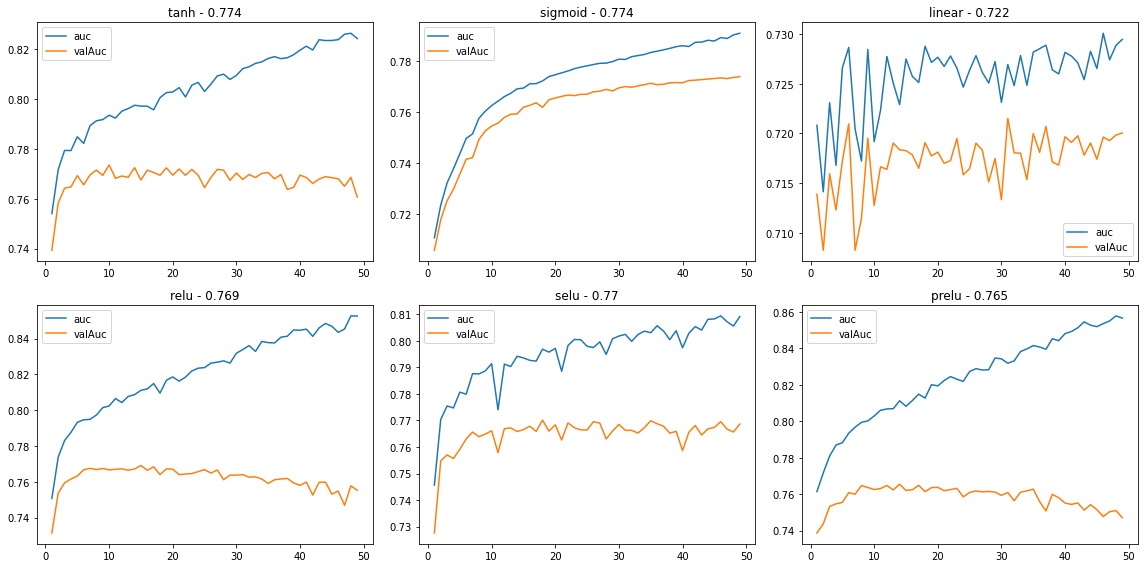

In [28]:
activations = ["tanh", "sigmoid", "linear", "relu", "selu", "prelu"]

fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()
n = 2
nu1 = 100
nu2 = 40
nu3 = 10

for i, acti in enumerate(activations):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, zmienne, objasniana, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation=acti, debug=False)
    print(acti, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(str(acti)+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/activations_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

tanh 0.7726082107678304
sigmoid 0.7741282840839134
linear 0.7206001697322644
relu 0.7722306019834297
selu 0.7732511381828874
prelu 0.7728301038508357


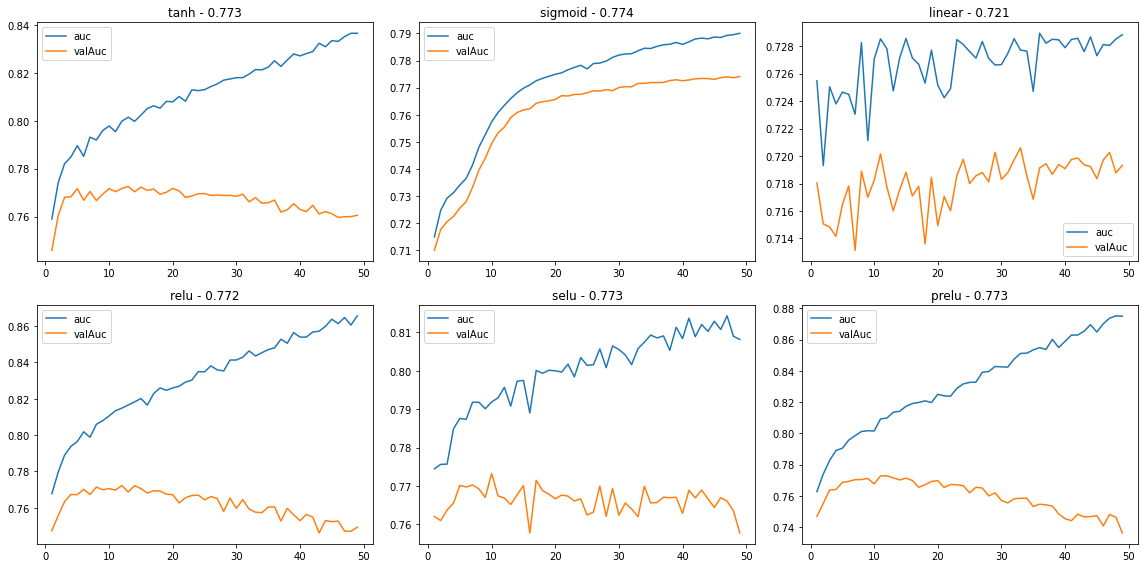

In [29]:
activations = ["tanh", "sigmoid", "linear", "relu", "selu", "prelu"]

fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()
n = 3
nu1 = 100
nu2 = 40
nu3 = 10

for i, acti in enumerate(activations):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, zmienne, objasniana, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation=acti, debug=False)
    print(acti, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(str(acti)+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/activations_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

Najszybciej najlepsze wyniki osiągamy dla funkcji relu i prelu. Pozwalają one na nieliniowe transformacje, są dość proste a sieć uczy się bardzo szybko.
W odróżnieniu od przykładu z zajęć funkcja sigmoid osiągnęła bardzo wysoki wynik oraz pozwoliła na osiągnięcie bardzo dobrego wyniku.

# Regularyzacja

Wprowadzamy regularyzację w celu ograniczenia przetrenowania. Zobaczmy jak różne poziomy ograniczenia informacji wpłyną na wyniki i przetrenowanie

0 0.7697239231556986
0.001 0.7738228720639654
0.05 0.7721838084477595
0.1 0.771982589078446
0.2 0.7716196704545544
0.5 0.7659914400076419


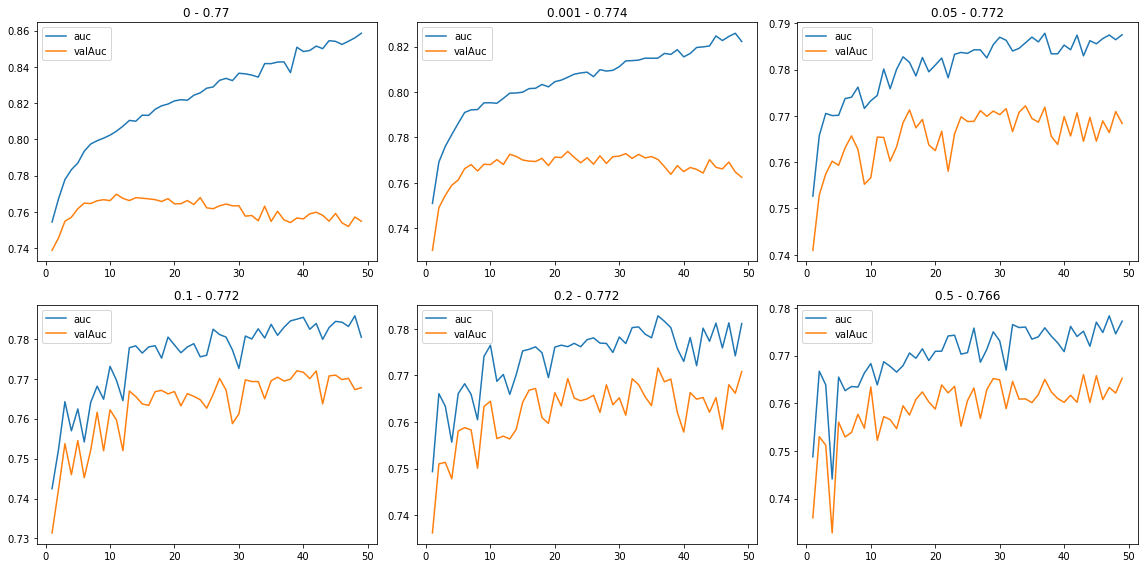

In [30]:
reguRates = [0, 0.001, 0.05, 0.1, 0.2, 0.5]

fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()
n = 2
nu1 = 100
nu2 = 40
nu3 = 10

for i, reguRate in enumerate(reguRates):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, zmienne, objasniana, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     regu=reguRate, debug=False)
    print(reguRate, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(str(reguRate)+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/reguRate_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

Dla średniej wielkości regularyzacji znajdujemy najlepsze wyniki. 
Zbyt mała prowadzi do szybkiego przetrenowania, natomiast duża nie pozwala na osiągnięcie dobrych wyników oraz widzimy duża wariancję.

# Dropout

Podczas treningu wyłączamy niektóre połączenia, a przez to musi się uczyć się tego samego na x różnych sposobów to spowoduje to uśrednienie błędu.
Dropout(jego wartość) określa prawdopodobieństwo, że dane połączenie zostanie wyłączone

In [ ]:
Wpierw robimy dropout dla pierwszej warstwy

0 0.7672731744268813
0.2 0.772649092409637
0.4 0.7745040655556654
0.5 0.7740150623590148
0.6 0.7752904549284736
0.8 0.7703516587950098


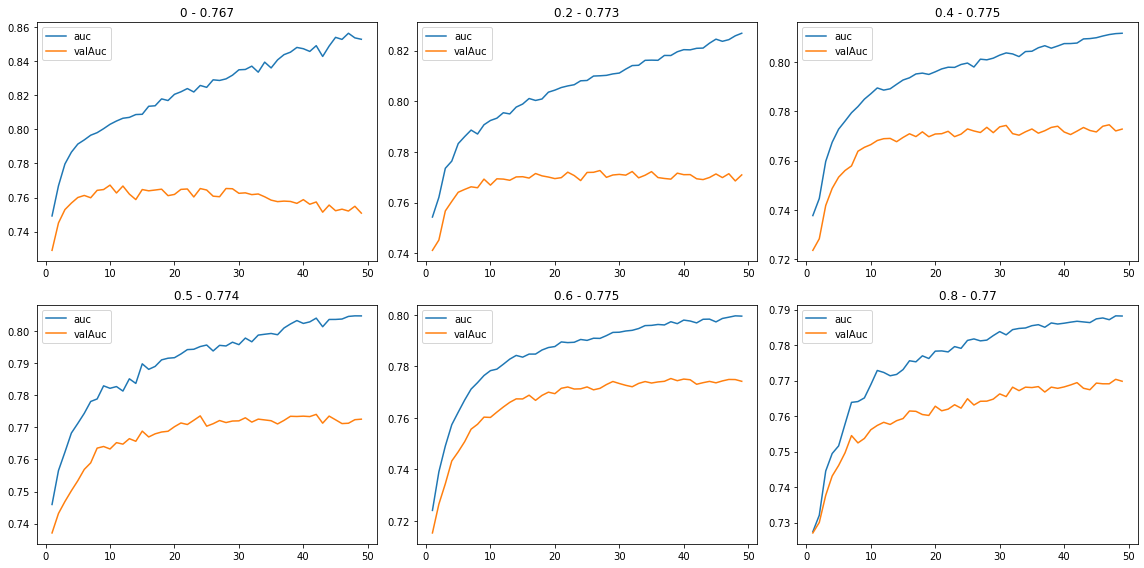

In [31]:
dropRates = [0, 0.2, 0.4, 0.5, 0.6, 0.8]

fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()
n = 2
nu1 = 100
nu2 = 40
nu3 = 10

for i, dropRate in enumerate(dropRates):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, zmienne, objasniana, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=dropRate, debug=False)
    print(dropRate, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(str(dropRate)+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/dropRate_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

Zastosowanie dropoutu od 0.2 do 0.6 znacząco ograniczyło nadmierne dopasowanie.
Wynik maksymalny pojawia się trochę później, ale proces przechodzi stabilniej.

Teraz sprawdzimy z dropoutem dla każdej warstwy

0 0.7677971115418155
0.2 0.7745480643778727
0.4 0.7745247750990171
0.5 0.7747777683267097
0.6 0.7733648615230229
0.8 0.7650888192185136


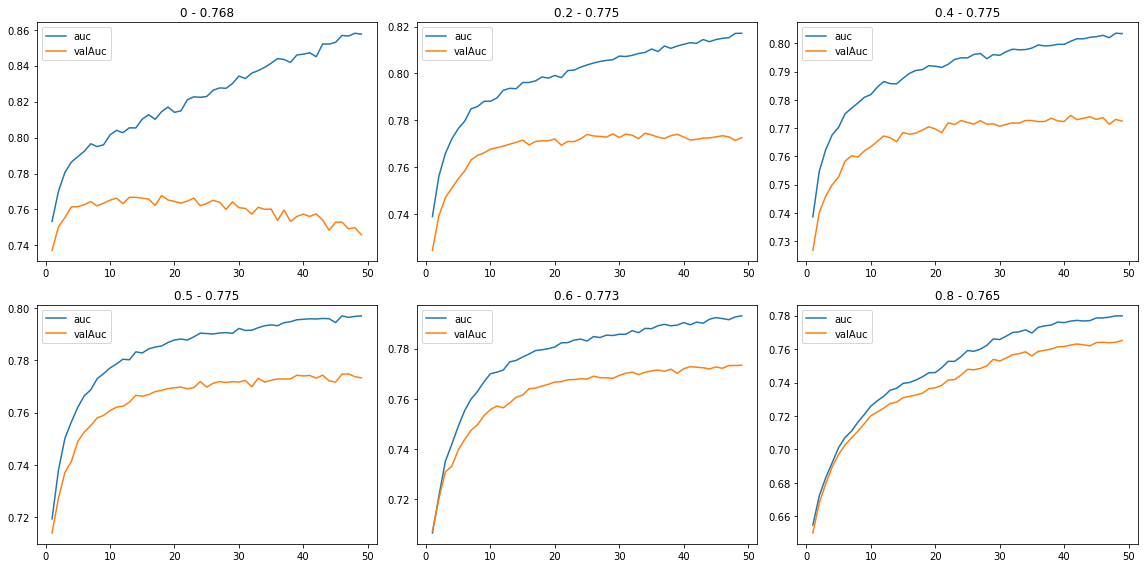

In [32]:
dropRates = [0, 0.2, 0.4, 0.5, 0.6, 0.8]

fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()
n = 2
nu1 = 100
nu2 = 40
nu3 = 10

for i, dropRate in enumerate(dropRates):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, zmienne, objasniana, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=dropRate, dropout_all_layers=True, debug=False)
    print(dropRate, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(str(dropRate)+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/dropRateAll_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

Teraz sprawdzimy dropout dla pierwszej warstwy, ale dla większej ilości warstw.

0 0.7684898421839639
0.2 0.7697519777793049
0.4 0.7738738218401698
0.5 0.7755845447759318
0.6 0.7750376408490799
0.8 0.7740923827648156


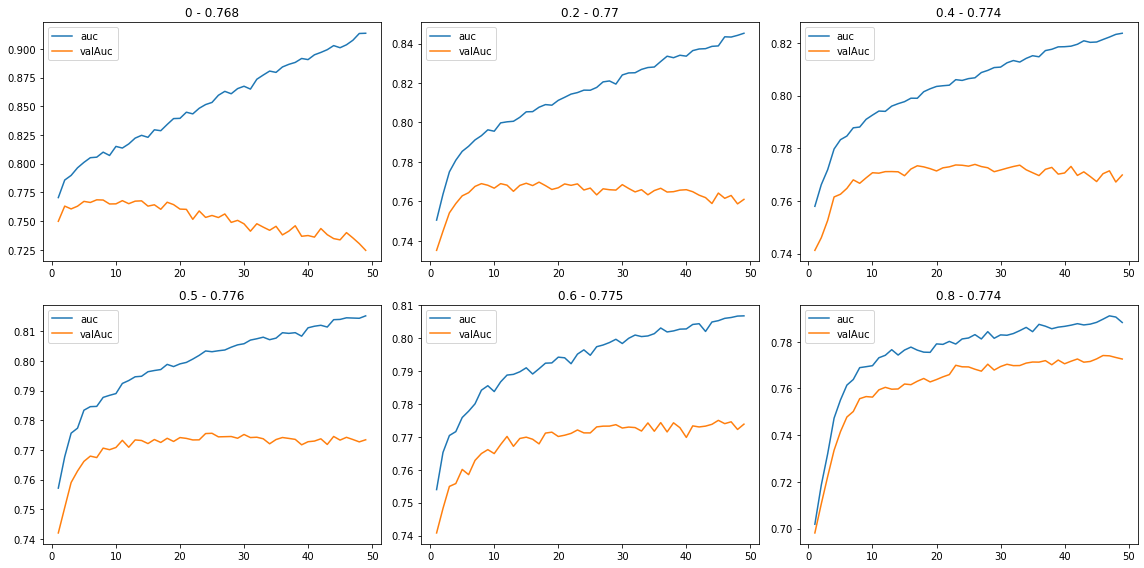

In [33]:
dropRates = [0, 0.2, 0.4, 0.5, 0.6, 0.8]

fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()
n = 3
nu1 = 150
nu2 = 60
nu3 = 20

for i, dropRate in enumerate(dropRates):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, zmienne, objasniana, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=dropRate, dropout_all_layers=False, debug=False)
    print(dropRate, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(str(dropRate)+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/dropRate_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

Wyniki już wychodzą bardzo dobre w okolicach 0.4-0.6, ale sprawdzimy jeszcze dla dropoutu dla wszystkich warstw.

0 0.7702394761302448
0.2 0.7734010853090584
0.4 0.7752128120557347
0.5 0.7747671269177556
0.6 0.7734052057199328
0.8 0.7381117726301385


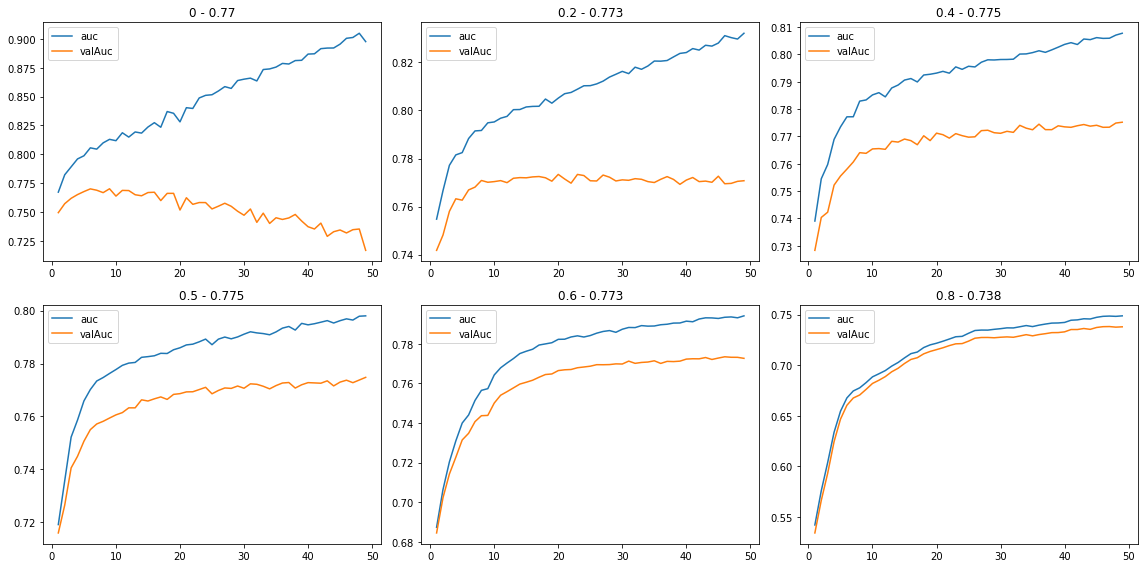

In [34]:
dropRates = [0, 0.2, 0.4, 0.5, 0.6, 0.8]

fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()
n = 3
nu1 = 150
nu2 = 60
nu3 = 20

for i, dropRate in enumerate(dropRates):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, zmienne, objasniana, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=dropRate, dropout_all_layers=True, debug=False)
    print(dropRate, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(str(dropRate)+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/dropRateAll_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

Ostatecznie sprawdzamy jak zadziała połączenie regularyzacji oraz dropoutu.

0 0.7730298542040983
0.2 0.7729318242549454
0.4 0.7731357308487423
0.5 0.7701528041832418
0.6 0.7709362555239483
0.8 0.7654271228661378


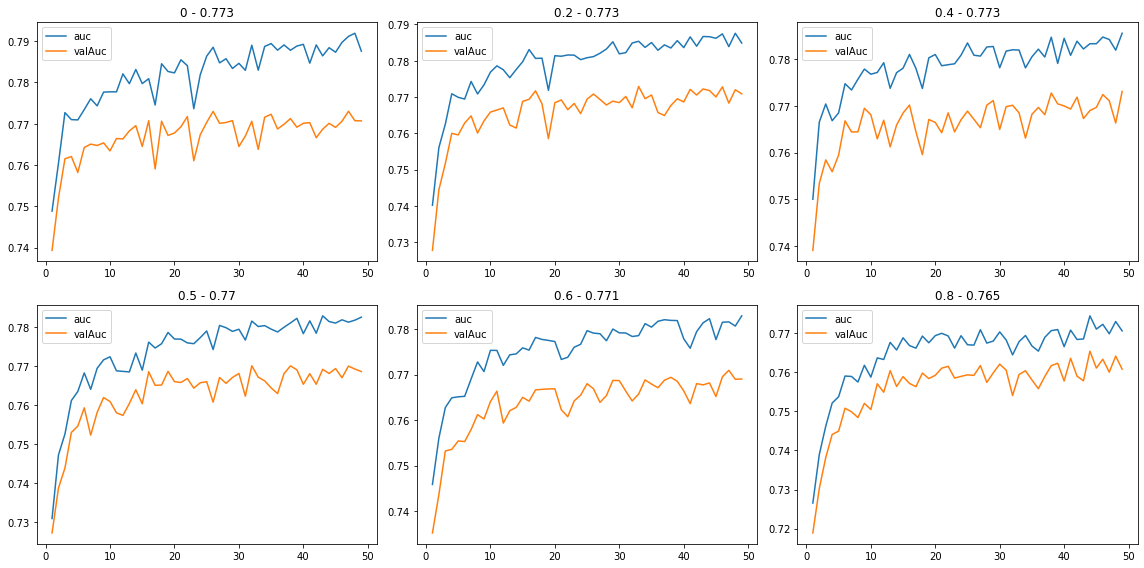

In [35]:
dropRates = [0, 0.2, 0.4, 0.5, 0.6, 0.8]

fig, ax = plt.subplots(2, 3, figsize=(16,8))
ax = ax.flatten()
n = 2
nu1 = 100
nu2 = 40
nu3 = 20

for i, dropRate in enumerate(dropRates):
    score, bestTrainProba, bestTestProba, history = net(X_train, X_valid, zmienne, objasniana, n=n, nu1=nu1, nu2=nu2, nu3=nu3,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                    regu=0.025,
                                     dropout_rate=dropRate, dropout_all_layers=False, debug=False)
    print(dropRate, score)
    history = pd.DataFrame(history)
    history.loc[1:, ["auc", "valAuc"]].plot(ax = ax[i])
    ax[i].set_title(str(dropRate)+ " - " + str(round(score, 3)))
    gc.collect()

plt.tight_layout()
fig.savefig(f"imgNets/dropRateAll_{n}_{nu1}_{nu2}_{nu3}.png")
plt.show()

Wyniki powyższej próby pokazują, iż niekoniecznie połaczenie tych dwóch metod w przynosi pozytywny efekt. Nasze wyniki przy podobnych parametrach pogorszyły się w zamian za ograniczenie przetrenowania.

# Wrapper do walidacji krzyżowej naszej sieci neuronowej

In [101]:
def CVTestNN(nFolds = 5, randomState=2020, features=zmienne, debug=False, *args, **kwargs):
    
    # Przygotujmy walidację krzyżową
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    # Zapamiętujemy wyniki zbioru treningowego i testowego
    WynikiTestowe = []
    WynikiTreningowe = []
    
    # Przechowajmy również predykcje dla poszczególnych foldów
    Predykcje = []
    
    # Razem z informacją o tym, jaki był ich indeks w oryginalnym zbiorze danych
    Indeksy = []
    
    # Przygotujmy listę historii
    Historie = []
    fold = 1
    for train, test in kf.split(dfsn.index.values):
        # Przygotowanie estymatora
        score, trainPred, testPred, history = net(dfsn.iloc[train], dfsn.iloc[test], zmienne, objasniana,
                                                            debug=False, *args, **kwargs)

        # Zachowajmy informacje o predykcjach dla tego foldu
        Predykcje.append(testPred.copy())
        
        # Razem z indeksami w oryginalnym data frame
        Indeksy.append(dfsn.iloc[test].index.tolist().copy())
        
        # Informowanie o każdym foldzie razem z wynikami treningowymi możemy opcjonalnie wyświetlać w trakcie
        trainScore = roc_auc_score(dfsn[objasniana].iloc[train], trainPred)
        testScore = roc_auc_score(dfsn[objasniana].iloc[test], testPred)
        
        WynikiTreningowe.append(trainScore)
        WynikiTestowe.append(testScore)
        
        
        Historie.append(history)
        fold+=1
        
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore)
        
    return WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie

Poszukajmy teraz najlepszych wyników dla sieci dwuwarstwowych, dla różnych parametrów

In [39]:
WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=2, nu1=100, nu2=40, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.2, dropout_all_layers=False, regu=0.025, debug=False)
print(np.mean(WynikiTestowe))

WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=2, nu1=100, nu2=40, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.5, dropout_all_layers=False, regu=0, debug=False)
print(np.mean(WynikiTestowe))

WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=2, nu1=200, nu2=60, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.2, dropout_all_layers=False, regu=0.025, debug=False)
print(np.mean(WynikiTestowe))

WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=2, nu1=200, nu2=60, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.5, dropout_all_layers=False, regu=0, debug=False)
print(np.mean(WynikiTestowe))

WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=2, nu1=200, nu2=60, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.2, dropout_all_layers=True, regu=0.025, debug=False)
print(np.mean(WynikiTestowe))

WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=2, nu1=200, nu2=60, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.5, dropout_all_layers=True, regu=0, debug=False)
print(np.mean(WynikiTestowe))

WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=2, nu1=50, nu2=100, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.2, dropout_all_layers=False, regu=0.025, debug=False)
print(np.mean(WynikiTestowe))

WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=2, nu1=50, nu2=100, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.5, dropout_all_layers=False, regu=0, debug=False)
print(np.mean(WynikiTestowe))

WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=2, nu1=50, nu2=100, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.2, dropout_all_layers=True, regu=0.025, debug=False)
print(np.mean(WynikiTestowe))

WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=2, nu1=50, nu2=100, nu3=10,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.5, dropout_all_layers=True, regu=0, debug=False)
print(np.mean(WynikiTestowe))

0.778777402764985
0.7799301692478335
0.7788582810961895
0.7783285998385301
0.778149284311218
0.7796582989976123
0.7791915642412037
0.7799572008469977
0.7784580302272848
0.7793034105065495


In [45]:
WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=2, nu1=100, nu2=40, nu3=10,
                                    epochs = 50, batchSize=100, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.5, dropout_all_layers=False, regu=0, debug=False)
print(np.mean(WynikiTestowe))

WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=2, nu1=50, nu2=100, nu3=10,
                                    epochs = 50, batchSize=100, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.5, dropout_all_layers=False, regu=0, debug=False)
print(np.mean(WynikiTestowe))

0.7800231695840651
0.7796263253691708


Teraz szukamy najlepszych dla sieci trzywarstwowych, spróbujmy dla parametrów, przy których najlepiej wypały sieci dwuwarstwowe.

In [41]:
WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=3, nu1=100, nu2=40, nu3=20,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.5, dropout_all_layers=False, regu=0, debug=False)
print(np.mean(WynikiTestowe))

WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=3, nu1=200, nu2=60, nu3=20,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.5, dropout_all_layers=True, regu=0, debug=False)
print(np.mean(WynikiTestowe))

WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=3, nu1=50, nu2=100, nu3=20,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.2, dropout_all_layers=False, regu=0.025, debug=False)
print(np.mean(WynikiTestowe))

WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=3, nu1=50, nu2=100, nu3=20,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.5, dropout_all_layers=False, regu=0, debug=False)
print(np.mean(WynikiTestowe))

WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=3, nu1=50, nu2=100, nu3=20,
                                    epochs = 50, batchSize=200, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.5, dropout_all_layers=True, regu=0, debug=False)
print(np.mean(WynikiTestowe))

0.7792941568472547
0.7792042595101967
0.7792273496483626
0.7790353117720799
0.7785131958665045


In [46]:
WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=3, nu1=100, nu2=40, nu3=10,
                                    epochs = 50, batchSize=100, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.5, dropout_all_layers=False, regu=0, debug=False)
print(np.mean(WynikiTestowe))

WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=3, nu1=200, nu2=60, nu3=10,
                                    epochs = 50, batchSize=100, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.5, dropout_all_layers=True, regu=0, debug=False)
print(np.mean(WynikiTestowe))

WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=3, nu1=50, nu2=100, nu3=10,
                                    epochs = 50, batchSize=100, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.2, dropout_all_layers=False, regu=0.025, debug=False)
print(np.mean(WynikiTestowe))

0.7794156879538111
0.7804723952254263
0.779329023565938


In [102]:
WynikiTreningowe, WynikiTestowe, Predykcje, Indeksy, Historie = CVTestNN(features=zmienne, n=3, nu1=200, nu2=60, nu3=10,
                                    epochs = 50, batchSize=100, optimizer="Adam", activation="prelu",
                                     dropout_rate=0.55, dropout_all_layers=True, regu=0, debug=False)
print(np.mean(WynikiTestowe))

WynikiModeluSN = {
    "Nazwa":"Sieci Neuronowe",
    "Opis":"Ostatni model w projekcie",
    "Specyfikacja modelu":'features=zmienne, n=3, nu1=200, nu2=60, nu3=10, epochs = 50, batchSize=100, optimizer="Adam", activation="prelu", dropout_rate=0.55, dropout_all_layers=True, regu=0, debug=False',
    "Wyniki Treningowe":WynikiTreningowe.copy(),
    "Wyniki Testowe":WynikiTestowe.copy(),
    "Predykcje":Predykcje.copy(),
    "Indeksy":Indeksy.copy(),
}


0.7798132849782443


In [103]:
wyniki3wykres = []
true = dfsn[objasniana].sort_index()
for result in [WynikiModelu1, WynikiModeluRF,WynikiModeluSN]:
    # Tworzymy wektor predykcji tworząc serię pandasa, a następnie sortujemy indeks
    pred = pd.Series(sum(result["Predykcje"], []), index=sum(result["Indeksy"], [])).sort_index()
    wyniki3wykres.append((true, pred, result["Nazwa"]))

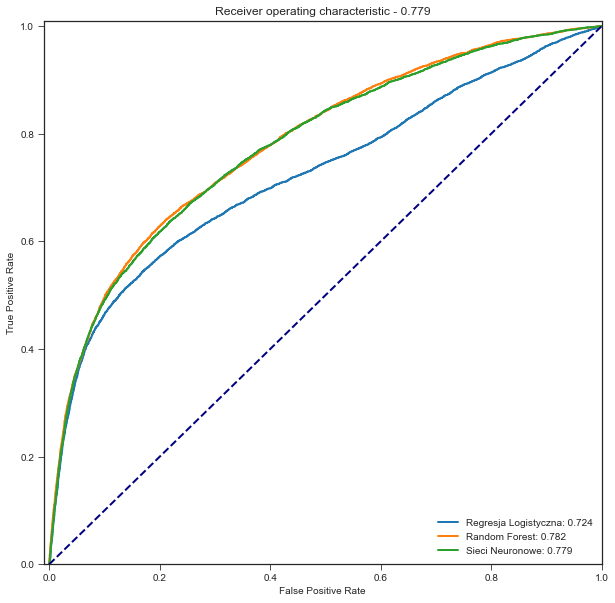

In [104]:
WykresROC(wyniki3wykres)

# Porównanie wyników wszystkich modeli

In [109]:
with open("KNN_model.p", "rb") as fp:
    WynikiModeluKNN = pickle.load(fp)
    
with open("model_XGB.p", "rb") as fp:
    WynikiModeluXGB = pickle.load(fp)

In [110]:
wynikifwykres = []
true = dfsn[objasniana].sort_index()
for result in [WynikiModelu1,WynikiModeluKNN, WynikiModeluRF,WynikiModeluXGB, WynikiModeluSN]:
    # Tworzymy wektor predykcji tworząc serię pandasa, a następnie sortujemy indeks
    pred = pd.Series(sum(result["Predykcje"], []), index=sum(result["Indeksy"], [])).sort_index()
    wynikifwykres.append((true, pred, result["Nazwa"]))

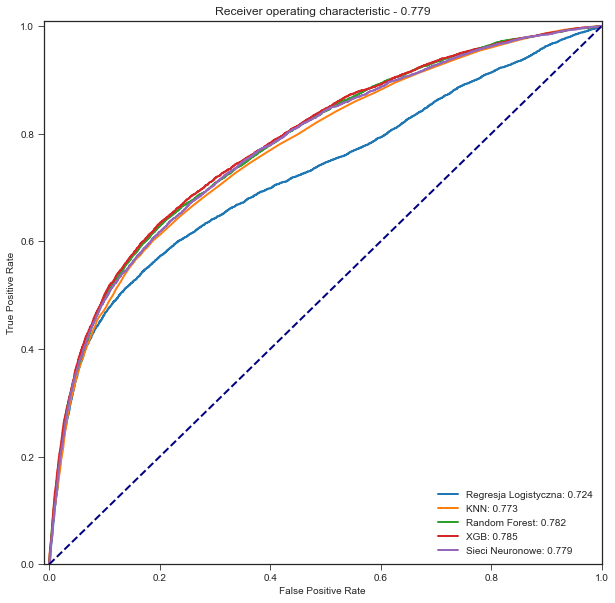

In [111]:
WykresROC(wynikifwykres)